# BUILD THE DATASET, XTRAIN, YTRAIN AND XTEXT

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')

Notre dataset est constitue de plusieurs fichiers contenant les mesures de parametres de differents sujets d'etudes.Les mesures dans chaque fichier correspondent a une position du patient(les labels).L'objectif de ce notebook est de construire un dataset reliant les mesures a des labels.Pour cela, pour chaque fichier, nous allons juste retourner la moyenne de chaque colonne.Pour cela nous aurons besoin de savoir le nombre de sujets que nous traitons et le nombre de fichiers par sujets


In [2]:
# paths of train and test subjects
str_train='./TRAIN/'
str_test='./CHALLENGE/'

In [3]:
def Builddataset(path):
    data={}
    for element in os.listdir(path):
        print(element)
        if os.path.isdir(path + element):
            listfiles = os.listdir(path + element)
            #Datalist = glob.glob(path + element +'/*.csv')
            for datfile in listfiles:
                dat= pd.read_csv(path + element + '/' + datfile,header=None)
                data[element + '/' + datfile] = np.array(dat)
    #return np.array(data)
    return data

In [4]:
def meanfile(file):
    data= pd.read_csv(file,header=None)
    data=np.array(data)
    #mean= data.max(axis=0)
    return data

In [5]:
Xfile= Builddataset(str_train)

Subject02
Subject03
Subject04
Subject05
Subject06
Subject07
Subject08
Subject09
Subject11
Subject12
Subject13
Subject16
Subject17
Subject18
Subject19
train.csv


In [6]:
Xtestfile= Builddataset(str_test)

challenge.csv
Subject01
Subject10
Subject14
Subject15


In [ ]:
dat= pd.read_csv('./Xtrain.txt',delimiter=' ',header=None)
X = np.array(dat)
X.shape

In [ ]:
dat= pd.read_csv('./Xtest.txt' ,delimiter=' ',header=None)
Xtest = np.array(dat)
Xtest.shape

In [ ]:
import csv

with open('Xtrain.csv', 'w' ,newline='') as writeXtrainFile:
    writerX = csv.writer(writeXtrainFile)
    writerX.writerows(X)
with open('Xtest.csv', 'w',newline='') as writeXFile:
    writerXtest = csv.writer(writeXFile)
    writerXtest.writerows(Xtest)
    
writeXtrainFile.close()
writeXFile.close()
#np.savetxt("Xtrain.txt",X)
#np.savetxt("Xtest.txt",Xtest)

In [9]:
len(Xfile)

6401

Au final notre Xtrain est constitue de 6401 lignes et de 19 colonnes. Ce qui veut dire que l'on a fait 6401 mesures sur les differents sujets (nombres de fichiers total) et que pour un sujet on relevait les 19 parametres. Maintenant ce que nous voulons faire maintenant c'est de labeliser chaque datapoint(ligne de X). Tu pourrqis demander comment on est sure que nous n'avons pas perdu de donnees. la reponse est tres simple. si tu regardes la taille de X tu vois qu'on a 6401 lignes, va verifier le fichier train.csv que l'on t'a donne, tu verras que labas aussi le nombres de lignes est 6402 mais avec une ligne de titres. en faisant fi de cette derniere, tu retrouves effectivement les 6401.

pour cela on va charger le fichier train.csv qui contient les labels et transformer les labels en classes (0 - 21) comme indique dans l'ennonce, qui representent les 22 positions possibles.

In [10]:
yfile=pd.read_csv('./TRAIN/train.csv')

In [11]:
#le contenu
yfile

,Subject,Datafile,Label
0,Subject02,Subject02/Subject02_Aufnahme000.csv,curve-left-step
1,Subject02,Subject02/Subject02_Aufnahme001.csv,curve-left-step
2,Subject02,Subject02/Subject02_Aufnahme002.csv,stand-to-sit
3,Subject02,Subject02/Subject02_Aufnahme003.csv,curve-right-spin-Rfirst
4,Subject02,Subject02/Subject02_Aufnahme004.csv,jump-one-leg
5,Subject02,Subject02/Subject02_Aufnahme005.csv,lateral-shuffle-right
6,Subject02,Subject02/Subject02_Aufnahme006.csv,curve-right-spin-Lfirst
7,Subject02,Subject02/Subject02_Aufnahme007.csv,v-cut-right-Lfirst
8,Subject02,Subject02/Subject02_Aufnahme008.csv,stair-down
9,Subject02,Subject02/Subject02_Aufnahme009.csv,v-cut-left-Rfirst


# Il Faut Restructurer les donner y

In [ ]:

y= []
y = np.array(y)
yfile = np.array(yfile)
for fil in yfile:
    print(fil[1])
    xr = Xfile[fil[1]]
    
    data.append(xr)
    y = np.concatenate((y,np.array([fil[2]]*xr.shape[0])))
X = np.array(data)
y.shape

Maintenant, on va convertir les labels en classes, pour cela, on doit creer un dictionnaire qui mappe chaque classe a un label. pour ce faire on va utiliser les commandes suivantes:

In [12]:
labels = {'sit-to-stand':0,'curve-left-step':1,'stand-to-sit':2, 'curve-right-step':3, 'curve-right-spin-Rfirst':4,'jump-one-leg':5, 'jump-two-leg':6, 'walk':7, 'run':8, 'stair-up':9, 'stand':10, 'v-cut-right-Lfirst':11,'lateral-shuffle-right':12,'v-cut-left-Rfirst':13,'v-cut-left-Lfirst':14,'curve-left-spin-Rfirst':15,'v-cut-right-Rfirst':16,'sit':17,'stair-down':18,'lateral-shuffle-left':19,'curve-left-spin-Lfirst':20,'curve-right-spin-Lfirst':21,'lay':22,}

In [13]:
dLabels = {0:'sit-to-stand',1:'curve-left-step', 2:'stand-to-sit', 3:'curve-right-step', 4:'curve-right-spin-Rfirst',5:'jump-one-leg', 6:'jump-two-leg', 7:'walk', 8:'run', 9:'stair-up', 10:'stand', 11:'v-cut-right-Lfirst',12:'lateral-shuffle-right',13:'v-cut-left-Rfirst',14:'v-cut-left-Lfirst',15:'curve-left-spin-Rfirst',16:'v-cut-right-Rfirst',17:'sit',18:'stair-down',19:'lateral-shuffle-left',20:'curve-left-spin-Lfirst',21:'curve-right-spin-Lfirst',22:'lay'}

In [14]:
#labels = {1:'curve-left-step', 2:'stand-to-sit', 3:'curve-right-step', 4:'curve-right-spin-Rfirst', 5:'jump-one-leg', 6:'jump-two-leg', 7:'walk', 8:'run', 9:'stair-up', 10:'stand', 11:'v-cut-right-Lfirst',12:'lateral-shuffle-right',13:'v-cut-left-Rfirst',14:'v-cut-left-Lfirst',15:'curve-left-spin-Rfirst',16:'v-cut-right-Rfirst',17:'sit',18:'stair-down',19:'lateral-shuffle-left',20:'curve-left-spin-Lfirst',21:'curve-right-spin-Lfirst', 22:'sit-to-stand'}

In [14]:
labels

{'sit-to-stand': 0,
 'curve-left-step': 1,
 'stand-to-sit': 2,
 'curve-right-step': 3,
 'curve-right-spin-Rfirst': 4,
 'jump-one-leg': 5,
 'jump-two-leg': 6,
 'walk': 7,
 'run': 8,
 'stair-up': 9,
 'stand': 10,
 'v-cut-right-Lfirst': 11,
 'lateral-shuffle-right': 12,
 'v-cut-left-Rfirst': 13,
 'v-cut-left-Lfirst': 14,
 'curve-left-spin-Rfirst': 15,
 'v-cut-right-Rfirst': 16,
 'sit': 17,
 'stair-down': 18,
 'lateral-shuffle-left': 19,
 'curve-left-spin-Lfirst': 20,
 'curve-right-spin-Lfirst': 21,
 'lay': 22}

In [15]:
#c'est la derniere colonne qui nous interesse donc on va l'extraire
y['Label'] =y['Label'].map(labels)
y['Label']

0        1
1        1
2        2
3        4
4        5
5       12
6       21
7       11
8       18
9       13
10      16
11       6
12      17
13       9
14       3
15       0
16       8
17      21
18       3
19      14
20       0
21      10
22      14
23      16
24      21
25       1
26       6
27      13
28      16
29       9
        ..
6371     0
6372    12
6373     8
6374    18
6375    14
6376    17
6377     7
6378    13
6379    21
6380    10
6381    17
6382    12
6383     9
6384    13
6385     1
6386     2
6387    17
6388    20
6389    18
6390     7
6391     8
6392     2
6393     9
6394    10
6395    11
6396    15
6397     5
6398     6
6399     3
6400     4
Name: Label, Length: 6401, dtype: int64

In [16]:
#Ylabel =Ylabel.map(dLabels)
#Ylabel
y

,Subject,Datafile,Label
0,Subject02,Subject02/Subject02_Aufnahme000.csv,1
1,Subject02,Subject02/Subject02_Aufnahme001.csv,1
2,Subject02,Subject02/Subject02_Aufnahme002.csv,2
3,Subject02,Subject02/Subject02_Aufnahme003.csv,4
4,Subject02,Subject02/Subject02_Aufnahme004.csv,5
5,Subject02,Subject02/Subject02_Aufnahme005.csv,12
6,Subject02,Subject02/Subject02_Aufnahme006.csv,21
7,Subject02,Subject02/Subject02_Aufnahme007.csv,11
8,Subject02,Subject02/Subject02_Aufnahme008.csv,18
9,Subject02,Subject02/Subject02_Aufnahme009.csv,13


# I-VIZUALISATION OF THE DATA

A ce niveau notre Dataset est deja pret. nous avons Nos donnees d'entrainement et nos donnees de Test. Nous allons explorer notre dataset et faire des visualisations pour mieux comprendre nos dataset et surtout chosisir nos algorithmes d'apprentissages.

### 1- visualisation du dataset

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import accuracy_score

In [18]:
#Nos donnees d'esntrainements 
Xtrain=X
Ytrain=np.array(y['Label']).reshape(-1,1)
#Nos donnees de Test
Xtest=Xtest

#we standardize the data for numerical precision and to reduce the variance inside the data
# we don't standardize the abels because they are categoricals datas
xtrain=minmax_scale(Xtrain)
xtest=minmax_scale(Xtest)

In [19]:
#CHECK IF THE DATA ARE BALANCED
def balanced(y):
    N,D =y.shape
    classes=[]
    label, counts = np.unique(y, return_counts=True)
    dictionary = dict(zip(dLabels, counts))
    for i in range(len(dictionary)):
        classe= (dictionary.get(i)/N )*100
        classes.append([i,classe])
    return classes

In [20]:
classes= balanced(Ytrain)
classes=np.array(classes)
dfclasses = pd.DataFrame({'Classes':classes[:,0],'Pourcentage (%)':classes[:,1]})
dfclasses

,Classes,Pourcentage (%)
0,0.0,4.514920
1,1.0,4.671145
2,2.0,4.514920
3,3.0,4.608655
4,4.0,4.686768
5,5.0,4.358694
6,6.0,4.374317
7,7.0,4.686768
8,8.0,4.686768
9,9.0,4.343071


We noticed that the classes are somehow balanced because the percentage of datapoints per classe is 4 or approximately 5. So The Accuracy metrics can be used to evaluate the performance of our model on this dataset. 

(6401, 3)


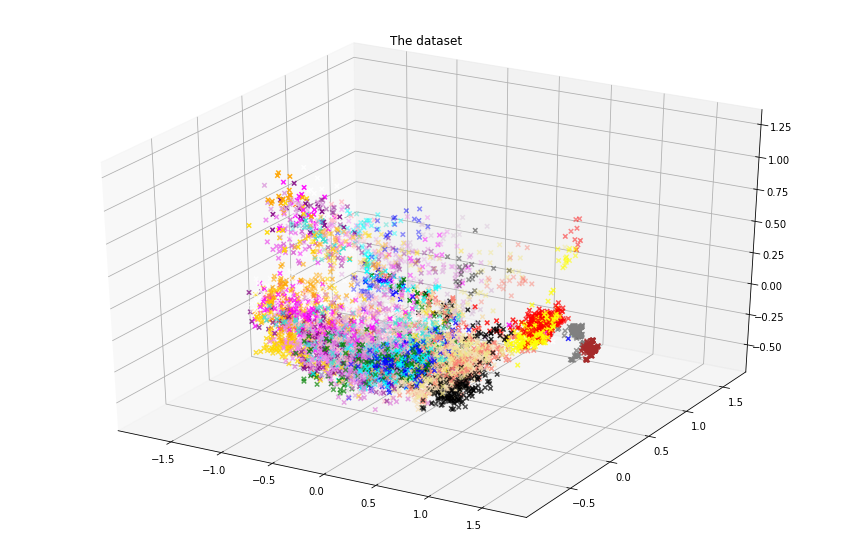

In [21]:
#Visualize our data via Kernel PCA
def colors(y):
    colors=[]
    for i in range(y.shape[0]):
        if y[i]==0:
            colors.append('red')
        if y[i]==1:
            colors.append('blue')
        if y[i]==2:
            colors.append('yellow')
        if y[i]==3:
            colors.append('green')
        if y[i]==4:
            colors.append('black')
        if y[i]==5:
            colors.append('white')
        if y[i]==6:
            colors.append('magenta')
        if y[i]==7:
            colors.append('cyan')
        if y[i]==8:
            colors.append('orange')
        if y[i]==9:
            colors.append('pink')
        if y[i]==10:
            colors.append('grey')
        if y[i]==11:
            colors.append('orchid')
        if y[i]==12:
            colors.append('purple')
        if y[i]==13:
            colors.append('gold')
        if y[i]==14:
            colors.append('thistle')
        if y[i]==15:
            colors.append('khaki')
        if y[i]==16:
            colors.append('violet')
        if y[i]==17:
            colors.append('brown')
        if y[i]==18:
            colors.append('turquoise')
        if y[i]==19:
            colors.append('plum')
        if y[i]==20:
            colors.append('wheat')
        if y[i]==21:
            colors.append('salmon')
        if y[i]==22:
            colors.append('dimgrey')
       
    return colors

np.random.seed(0)
kpca = KernelPCA(n_components =3)
X_kpca = kpca.fit_transform(xtrain)
print(X_kpca.shape)
fig=plt.figure(figsize=[15,10])
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2],c=colors(Ytrain),marker='x')
#ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2],X_kpca[:,3],c=colors(Ytrain),marker='o')

plt.title("The dataset")

plt.show()

In [22]:
# Maintenant on va diviser nos donnees d'entrainement en Train et en test pour pouvoir apprecier nos differents moedeles
x_train,x_test,y_train,y_test= train_test_split(xtrain,Ytrain,test_size=0.2,random_state=0)

In [23]:
x_train.shape,y_train.shape

((5120, 19), (5120, 1))

#### The function error defined above is very helpful for us. it will help us to see the mistakes we did in the prediction of the classes of the test data.

In [24]:
def error(ytrue, ypred):
    count=0
    n= ytrue.shape[0]
    for i in range(n):
        if(ytrue[i] != ypred[i]):
            count +=1
    return (count*100/n)

def errorNN(ytrue, ypred):
    count=0
    n,d= ytrue.shape
    for i in range(n):
        if(ytrue[i] != ypred[i]):
            count +=1
    return (count*100/n)

def binarization(y):
    n,d= y.shape
    maxi=0
    ybon= np.zeros((n,d),dtype=int)
    for i in range(n):
        maxi= np.argmax(y[i])
        for j in range(d):
            if j==maxi:
                ybon[i,j]=1
    return ybon

# II-PREDICTION WITH BRUT DATA

II-1 LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)
Ypred_Logistic = modelLR.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_Logistic)

print("The Acuracy of the model is:",accuracy *100)
print("The error of prediction is:", error(y_test,Ypred_Logistic))

The Acuracy of the model is: 54.87900078064013
The error of prediction is: 45.120999219359874


II-2 GAUSSIAN PROCESS CLASSIFIER

In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [84]:
# modelGP = GaussianProcessClassifier()
# modelGP.fit(x_train, y_train)
# Ypred_GPC = modelGP.predict(x_test)
# accuracy = accuracy_score(y_test.flatten(),Ypred_GPC)

# print("The Acuracy of the model is:",accuracy*100)
# print("The error of prediction is:", error(y_test,Ypred_GPC))

II-3 DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
modelDTC = DecisionTreeClassifier()
modelDTC.fit(x_train, y_train)
Ypred_DTC = modelDTC.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_DTC)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_DTC))

The Acuracy of the model is: 74.31693989071039
The error of prediction is: 25.683060109289617


II-4 KNN CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(x_train, y_train)
Ypred_KNN= modelKNN.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_KNN)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_KNN))

The Acuracy of the model is: 84.77751756440281
The error of prediction is: 15.22248243559719


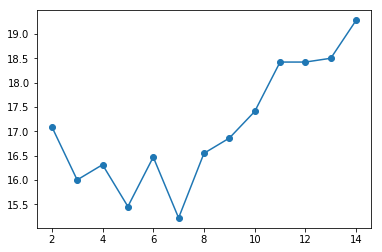

In [27]:
#Searching for the best Parameter
errors=[]
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    errors.append(100*(1-knn.score(x_test,y_test)))
plt.plot(range(2,15),errors,'o-')
plt.show()

II-5 LDA ANALYSIS

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(x_train, y_train)
Ypred_LDA= modelLDA.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_LDA)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_LDA))

The Acuracy of the model is: 54.48868071818892
The error of prediction is: 45.51131928181108


II-6 GAUSSIAN NAIVE BAYE

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train)
Ypred_GNB= modelGNB.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_GNB)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_GNB))

The Acuracy of the model is: 42.31069476971116
The error of prediction is: 57.68930523028884


II-7 RANDOM FOREST CLASSIFIER

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
modelRFT = RandomForestClassifier()
modelRFT.fit(x_train, y_train)
Ypred_RFC=modelRFT.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_RFC)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_RFC))

The Acuracy of the model is: 85.63622170179546
The error of prediction is: 14.363778298204528


II-8 LINEAR SVM

In [51]:
from sklearn.svm import LinearSVC

In [52]:
modelLSVC = LinearSVC(penalty='l2',loss='squared_hinge',C=0.5)
modelLSVC.fit(x_train, y_train)
Ypred_LSVC=modelLSVC.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_LSVC)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_LSVC))

The Acuracy of the model is: 55.893832943013265
The error of prediction is: 44.10616705698673


II-9 NON LINEAR SVM WITH RBF KERNEL

In [97]:
from sklearn.svm import SVC

In [98]:
modelRBF = SVC(kernel='rbf',probability=True)
modelRBF.fit(x_train, y_train)
Ypred_SVCRBF=modelRBF.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_SVCRBF)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_SVCRBF))

The Acuracy of the model is: 23.73145979703357
The error of prediction is: 76.26854020296643


II-10 NON LINEAR SVM WITH LINEAR KERNEL

In [99]:
modelCLIN = SVC(kernel='linear',probability=True)
modelCLIN.fit(x_train, y_train)
Ypred_SVCLIN=modelCLIN.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_SVCLIN)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_SVCLIN))

The Acuracy of the model is: 44.4184231069477
The error of prediction is: 55.5815768930523


II-11 NON LINEAR SVM WITH POLYNOMIAL KERNEL

In [100]:
modelPOLY = SVC(kernel='poly',probability=True, degree=3)
modelPOLY.fit(x_train, y_train)
Ypred_SVCPOLY=modelPOLY.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_SVCPOLY)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_SVCPOLY))

The Acuracy of the model is: 7.8064012490242005
The error of prediction is: 92.1935987509758


II-12 NNON LINEAR SVM WITH SIGMOID KERNEL

In [101]:
modelSIG = SVC(kernel='sigmoid',probability=True)
modelSIG.fit(x_train, y_train)
Ypred_SVCSIG=modelSIG.predict(x_test)
accuracy = accuracy_score(y_test.flatten(),Ypred_SVCSIG)

print("The Acuracy of the model is:",accuracy*100)
print("The error of prediction is:", error(y_test,Ypred_SVCSIG))

The Acuracy of the model is: 14.519906323185012
The error of prediction is: 85.48009367681499


# III- MODEL SELECTION

In [102]:
from sklearn import model_selection

LR: 37.714844 (2.321591)
DTC: 77.187500 (2.064777)
KNN: 93.496094 (1.223006)
LDA: 45.351562 (2.212814)
GNB: 35.488281 (2.299468)
RFC: 81.914062 (1.974879)
LSVM: 45.117188 (2.157297)
RBFK: 16.035156 (2.956195)
PLOKYK: 7.324219 (1.477807)
SIGK: 10.664062 (1.500732)


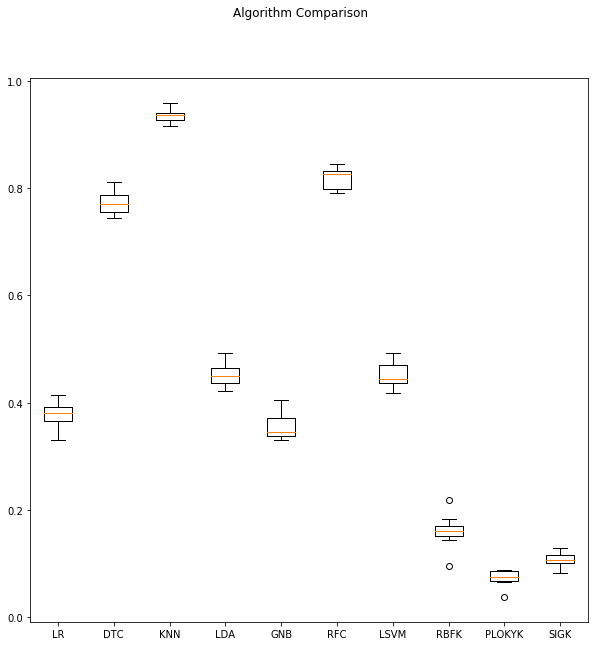

In [103]:
# prepare configuration for cross validation test harness
seed = 100
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('GPC', GaussianProcessClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=4)))
models.append(('LSVM',LinearSVC()))
models.append(('RBFK',SVC(kernel='rbf')))
models.append(('PLOKYK',SVC(kernel='poly')))
models.append(('SIGK',SVC(kernel='sigmoid')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=[10,10])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

 ### IV-TUNING THE PARAMETERS OF MODELS WITH GRIDSEARCH AND MODEL SELECTION

#### III-1 KNN TUNING PAREMETERS

In [29]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(x_train, y_train)
Ypred_KNN= modelKNN.predict(xtest)
Ypred = pd.DataFrame({'Labels':Ypred_KNN})
Ypred['Labels'] =Ypred['Labels'].map(dLabels)
Ypred

,Labels
0,stair-down
1,walk
2,curve-right-spin-Rfirst
3,sit-to-stand
4,walk
5,v-cut-right-Rfirst
6,lateral-shuffle-left
7,stand
8,curve-left-spin-Rfirst
9,curve-left-step


In [30]:
Ytest=pd.read_csv('./CHALLENGE/challenge.csv')
Ytest['Label'] = Ypred['Labels']
Ytest

,Subject,Datafile,Label
0,Subject01,Subject01/Subject01_Aufnahme000.csv,stair-down
1,Subject01,Subject01/Subject01_Aufnahme001.csv,walk
2,Subject01,Subject01/Subject01_Aufnahme002.csv,curve-right-spin-Rfirst
3,Subject01,Subject01/Subject01_Aufnahme003.csv,sit-to-stand
4,Subject01,Subject01/Subject01_Aufnahme004.csv,walk
5,Subject01,Subject01/Subject01_Aufnahme005.csv,v-cut-right-Rfirst
6,Subject01,Subject01/Subject01_Aufnahme006.csv,lateral-shuffle-left
7,Subject01,Subject01/Subject01_Aufnahme007.csv,stand
8,Subject01,Subject01/Subject01_Aufnahme008.csv,curve-left-spin-Rfirst
9,Subject01,Subject01/Subject01_Aufnahme009.csv,curve-left-step


In [31]:
with open('chalenge.csv', 'w', newline='') as writeChlgeFile:
    writerX = csv.writer(writeChlgeFile)
    writerX.writerows(np.array(Ytest))
writeChlgeFile.close()

In [32]:
np.unique(Ypred_KNN)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)